In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [258]:
data=pd.read_csv("/content/50_Startups (1).csv")

In [259]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [261]:
data.isna().sum() #no null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# EDA

In [262]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [263]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [264]:
data.duplicated().sum()

0

{'boxes': [<matplotlib.lines.Line2D at 0x7f655cb29c10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f655cab1c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f655cab8c90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f655cab8750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f655cab11d0>,
  <matplotlib.lines.Line2D at 0x7f655cab1710>]}

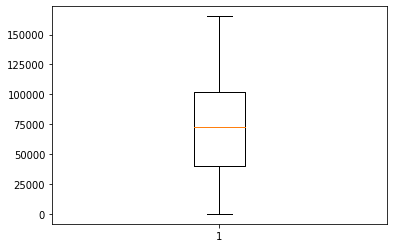

In [265]:
data_RDSpend=data['R&D Spend']
plt.boxplot(data_RDSpend)

{'boxes': [<matplotlib.lines.Line2D at 0x7f655ca8e1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f655ca96250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f655ca9a290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f655ca96d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f655ca8e790>,
  <matplotlib.lines.Line2D at 0x7f655ca8ecd0>]}

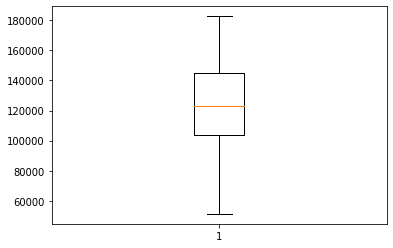

In [266]:
data_Admin=data['Administration']
plt.boxplot(data_Admin)

{'boxes': [<matplotlib.lines.Line2D at 0x7f655c9fc250>],
 'caps': [<matplotlib.lines.Line2D at 0x7f655ca042d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f655ca0c310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f655ca04d90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f655c9fc810>,
  <matplotlib.lines.Line2D at 0x7f655c9fcd50>]}

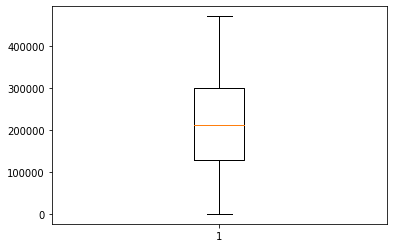

In [267]:
data_market=data['Marketing Spend']
plt.boxplot(data_market)

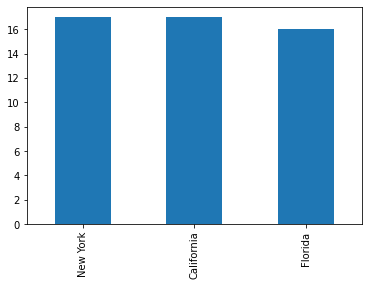

In [268]:
data['State'].value_counts().plot.bar()

In [269]:
#cagegorical data
obj_column=data[['State']]

In [270]:
obj_column.isnull().sum()

State    0
dtype: int64

In [271]:
obj_column

,State
0,New York
1,California
2,Florida
3,New York
4,Florida
5,New York
6,California
7,Florida
8,New York
9,California


In [272]:
obj_column.shape

(50, 1)

Dummy Variables

In [273]:
data_dummy=pd.get_dummies(data,columns=['State'])

In [274]:
data_dummy

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [275]:
data=data_dummy

# Model building

In [276]:
model=smf.ols("data['Profit']~data['R&D Spend']+data['Administration']+data['Marketing Spend']+data['State_California']+data['State_Florida']+data['State_New York']", data=data).fit()

In [277]:
model.params

Intercept                   37633.233317
data['R&D Spend']               0.806023
data['Administration']         -0.027004
data['Marketing Spend']         0.026980
data['State_California']    12492.110514
data['State_Florida']       12690.899307
data['State_New York']      12450.223495
dtype: float64

In [278]:
print(model.tvalues,'\n',model.pvalues)

Intercept                    7.417409
data['R&D Spend']           17.368580
data['Administration']      -0.517012
data['Marketing Spend']      1.573889
data['State_California']     5.099242
data['State_Florida']        4.654306
data['State_New York']       5.007401
dtype: float64 
 Intercept                   2.807645e-09
data['R&D Spend']           2.578772e-21
data['Administration']      6.077373e-01
data['Marketing Spend']     1.226769e-01
data['State_California']    6.942555e-06
data['State_Florida']       2.992503e-05
data['State_New York']      9.409010e-06
dtype: float64


In [279]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [280]:
model1=smf.ols("data['Profit']~data['R&D Spend']+data['Administration']+data['Marketing Spend']", data=data).fit() #removing the categorical data

In [281]:
model1.params

Intercept                  50122.192990
data['R&D Spend']              0.805715
data['Administration']        -0.026816
data['Marketing Spend']        0.027228
dtype: float64

In [282]:
model1.rsquared

0.9507459940683246

In [283]:
model.rsquared #model1 and model rsquared values are almost the same

0.9507524843355148

In [284]:
print(model1.tvalues,'\n',model1.pvalues)

Intercept                   7.626218
data['R&D Spend']          17.846374
data['Administration']     -0.525507
data['Marketing Spend']     1.655077
dtype: float64 
 Intercept                  1.057379e-09
data['R&D Spend']          2.634968e-22
data['Administration']     6.017551e-01
data['Marketing Spend']    1.047168e-01
dtype: float64


In [285]:
(model1.rsquared, model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

Calculating VIF

In [286]:
rsq_RDSpend=smf.ols("data['R&D Spend']~data['Administration']+data['Marketing Spend']",data=data).fit().rsquared
vif_RDSpend=1/(1-rsq_RDSpend)

rsq_Admin=smf.ols("data['Administration']~data['R&D Spend']+data['Marketing Spend']", data=data).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

rsq_Market=smf.ols("data['Marketing Spend']~data['Administration']+data['R&D Spend']", data=data).fit().rsquared
vif_Market=1/(1-rsq_Market)
d1={'Variables':['R&D Spend', 'Administration', 'Marketing Spend'], 'Rsquared':[rsq_RDSpend, rsq_Admin, rsq_Market], 'VIF':[vif_RDSpend, vif_Admin, vif_Market]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,Rsquared,VIF
0,R&D Spend,0.594962,2.468903
1,Administration,0.149002,1.175091
2,Marketing Spend,0.570220,2.326773


In [287]:
# not possible to build vif for state variables as divide by zero error encountered
rsq_state_cali=smf.ols("data['State_California']~data['R&D Spend']+data['Administration']+data['Marketing Spend']+data['State_Florida']+data['State_New York']",data=data).fit().rsquared
vif_state_cali=1/(1-rsq_state_cali)
vif_state_cali

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


inf

# QQ plot

Test for Normality of Residuals (Q-Q plot)

<function matplotlib.pyplot.show>

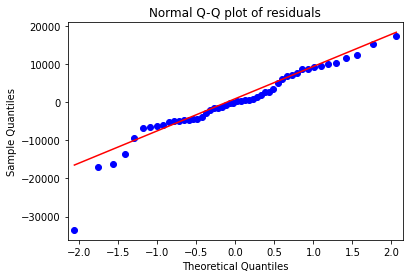

In [288]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show

Q-Q plot outliers

In [289]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

# cooks distance

Cooks distance

In [290]:
model_influence_V=model.get_influence()
(c_V,_)=model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks Distance')

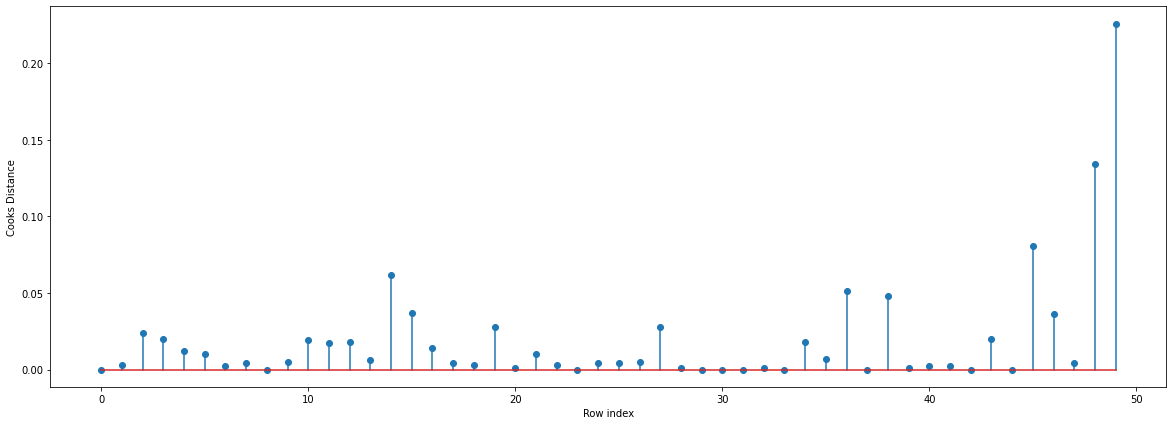

In [291]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [292]:
(np.argmax(c_V),np.max(c_V))

(49, 0.22625094501509282)

# Influence Points

influencers

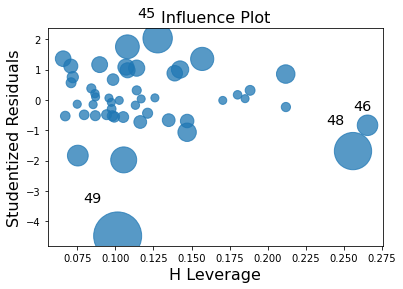

In [293]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [294]:
k=data.shape[1]
n=data.shape[0]
levarage_cutoff=3*((k+1)/n)

In [295]:
levarage_cutoff

0.48

In [296]:
#hence no high leverage values present as seen in the above influence plot

In [297]:
#choose the model params and the rsqured value and also state that there are no influencers and although 49 is a high outlier, its removal does not affect the final multiple linear regression model

In [298]:
data2=pd.read_csv("/content/50_Startups (1).csv")

In [299]:
data2=data2.drop(data2.index[[46,48,49]],axis=0).reset_index()

In [300]:
data2.head()

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [301]:
model12=smf.ols("data2['Profit']~data2['Marketing Spend']+data2['R&D Spend']+data2['Administration']",data=data2).fit()

In [302]:
model12.rsquared

0.9614129113440602

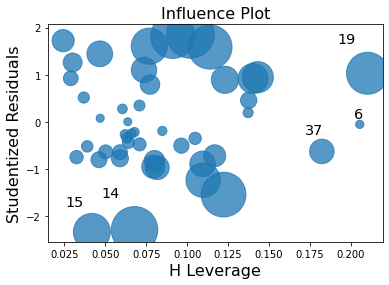

In [303]:
influence_plot(model12)
plt.show()

In [304]:
levarage_cutoff

0.48

In [335]:
model12.params

Intercept                   58228.661466
data2['Marketing Spend']        0.025087
data2['R&D Spend']              0.764210
data2['Administration']        -0.053193
dtype: float64

In [336]:
model12.pvalues

Intercept                   1.320777e-12
data2['Marketing Spend']    9.719027e-02
data2['R&D Spend']          2.824273e-22
data2['Administration']     2.358069e-01
dtype: float64

# square transformation on data2 dataset

In [305]:
data2=data2.drop(['index'],axis=1)

In [306]:
data2=data2.drop(['State'],axis=1)

In [307]:
data2.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [314]:
data2_sq=data2**2

In [316]:
model_sq=smf.ols("data2_sq['Profit']~data2_sq['R&D Spend']+data2_sq['Administration']+data2_sq['Marketing Spend']",data=data2_sq).fit()

In [317]:
model_sq.rsquared

0.9579480089175957

# reciprocal transformation

In [322]:
data2_reci=data2**-1

In [326]:
data2_reci.replace([np.inf, -np.inf], np.nan, inplace=True)

In [327]:
data2_reci.dropna()

,R&D Spend,Administration,Marketing Spend,Profit
0,0.000006,0.000007,0.000002,0.000005
1,0.000006,0.000007,0.000002,0.000005
2,0.000007,0.000010,0.000002,0.000005
3,0.000007,0.000008,0.000003,0.000005
4,0.000007,0.000011,0.000003,0.000006
5,0.000008,0.000010,0.000003,0.000006
6,0.000007,0.000007,0.000008,0.000006
7,0.000008,0.000007,0.000003,0.000006
8,0.000008,0.000007,0.000003,0.000007
9,0.000008,0.000009,0.000003,0.000007


In [328]:
model_reci=smf.ols("data2_reci['Profit']~data2_reci['R&D Spend']+data2_reci['Administration']+data2_reci['Marketing Spend']",data=data2_reci).fit()

In [329]:
model_reci.rsquared

0.2764304989711829

# log transformation

In [330]:
data2_log=np.log(data2)

In [331]:
data2_log.replace([np.inf, -np.inf], np.nan, inplace=True)

In [332]:
data2_log.dropna()

,R&D Spend,Administration,Marketing Spend,Profit
0,12.015815,11.826990,13.064277,12.166613
1,11.999034,11.927533,13.003351,12.164167
2,11.941075,11.524316,12.918862,12.160292
3,11.880151,11.684117,12.856311,12.116706
4,11.864338,11.422911,12.810849,12.020875
5,11.789624,11.511071,12.801776,11.963945
6,11.810178,11.899540,11.757571,11.958396
7,11.777580,11.888138,12.688118,11.956024
8,11.699758,11.909814,12.649518,11.933028
9,11.722659,11.596155,12.628007,11.916789


In [333]:
model_log=smf.ols("data2_log['Profit']~data2_log['R&D Spend']+data2_log['Administration']+data2_log['Marketing Spend']",data=data2_log).fit()

In [334]:
model_log.rsquared

0.7032245839653255